In [228]:
import pandas as pd

wc=pd.read_csv("Wholesale_Customers_data.csv")
wc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545


In [229]:
print(wc.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [230]:
wc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
327,1,3,21117,1162,4754,269,1328,395
328,1,3,1982,3218,1493,1541,356,1449
329,1,3,16731,3922,7994,688,2371,838
330,1,3,10290,1981,2232,1038,168,2125


In [231]:
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           332 non-null    int64
 1   Region            332 non-null    int64
 2   Fresh             332 non-null    int64
 3   Milk              332 non-null    int64
 4   Grocery           332 non-null    int64
 5   Frozen            332 non-null    int64
 6   Detergents_Paper  332 non-null    int64
 7   Delicassen        332 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [232]:
wc.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,1.286145,2.539157,9547.397590,4105.180723,5875.614458,1863.048193,1958.975904,1016.602410
std,0.452640,0.782148,8161.831206,3363.303146,5038.930756,1707.890373,2347.470292,824.356784
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,2989.750000,1352.500000,2011.500000,582.000000,231.750000,360.750000
50%,1.000000,3.000000,7483.500000,3087.000000,3835.500000,1270.500000,715.500000,774.000000
75%,2.000000,3.000000,13987.250000,6251.750000,8928.500000,2587.500000,3461.250000,1456.000000
max,2.000000,3.000000,37036.000000,14982.000000,22272.000000,7683.000000,8969.000000,3637.000000


In [233]:
wc.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

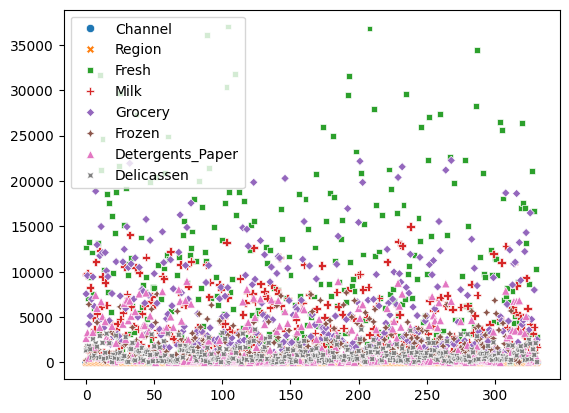

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(wc)
plt.show()

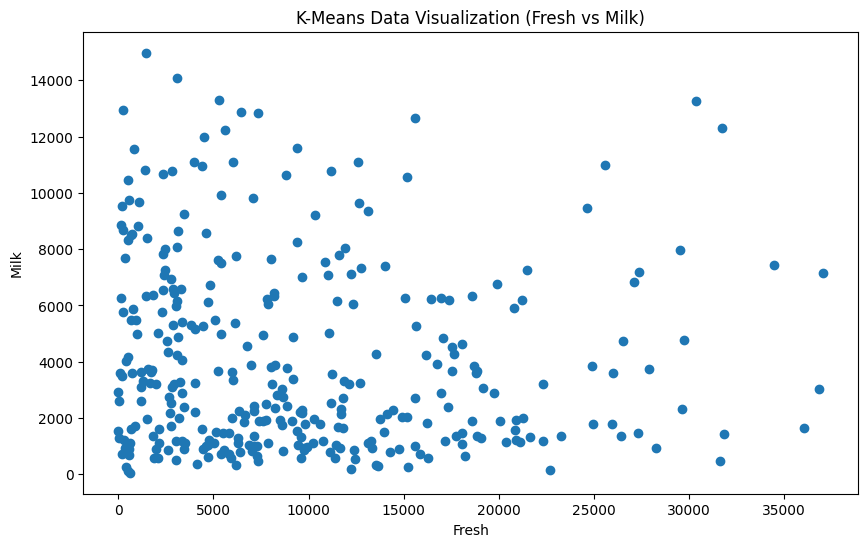

In [235]:
plt.figure(figsize=(10,6))
plt.scatter(wc['Fresh'], wc['Milk'])
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title("K-Means Data Visualization (Fresh vs Milk)")
plt.show()

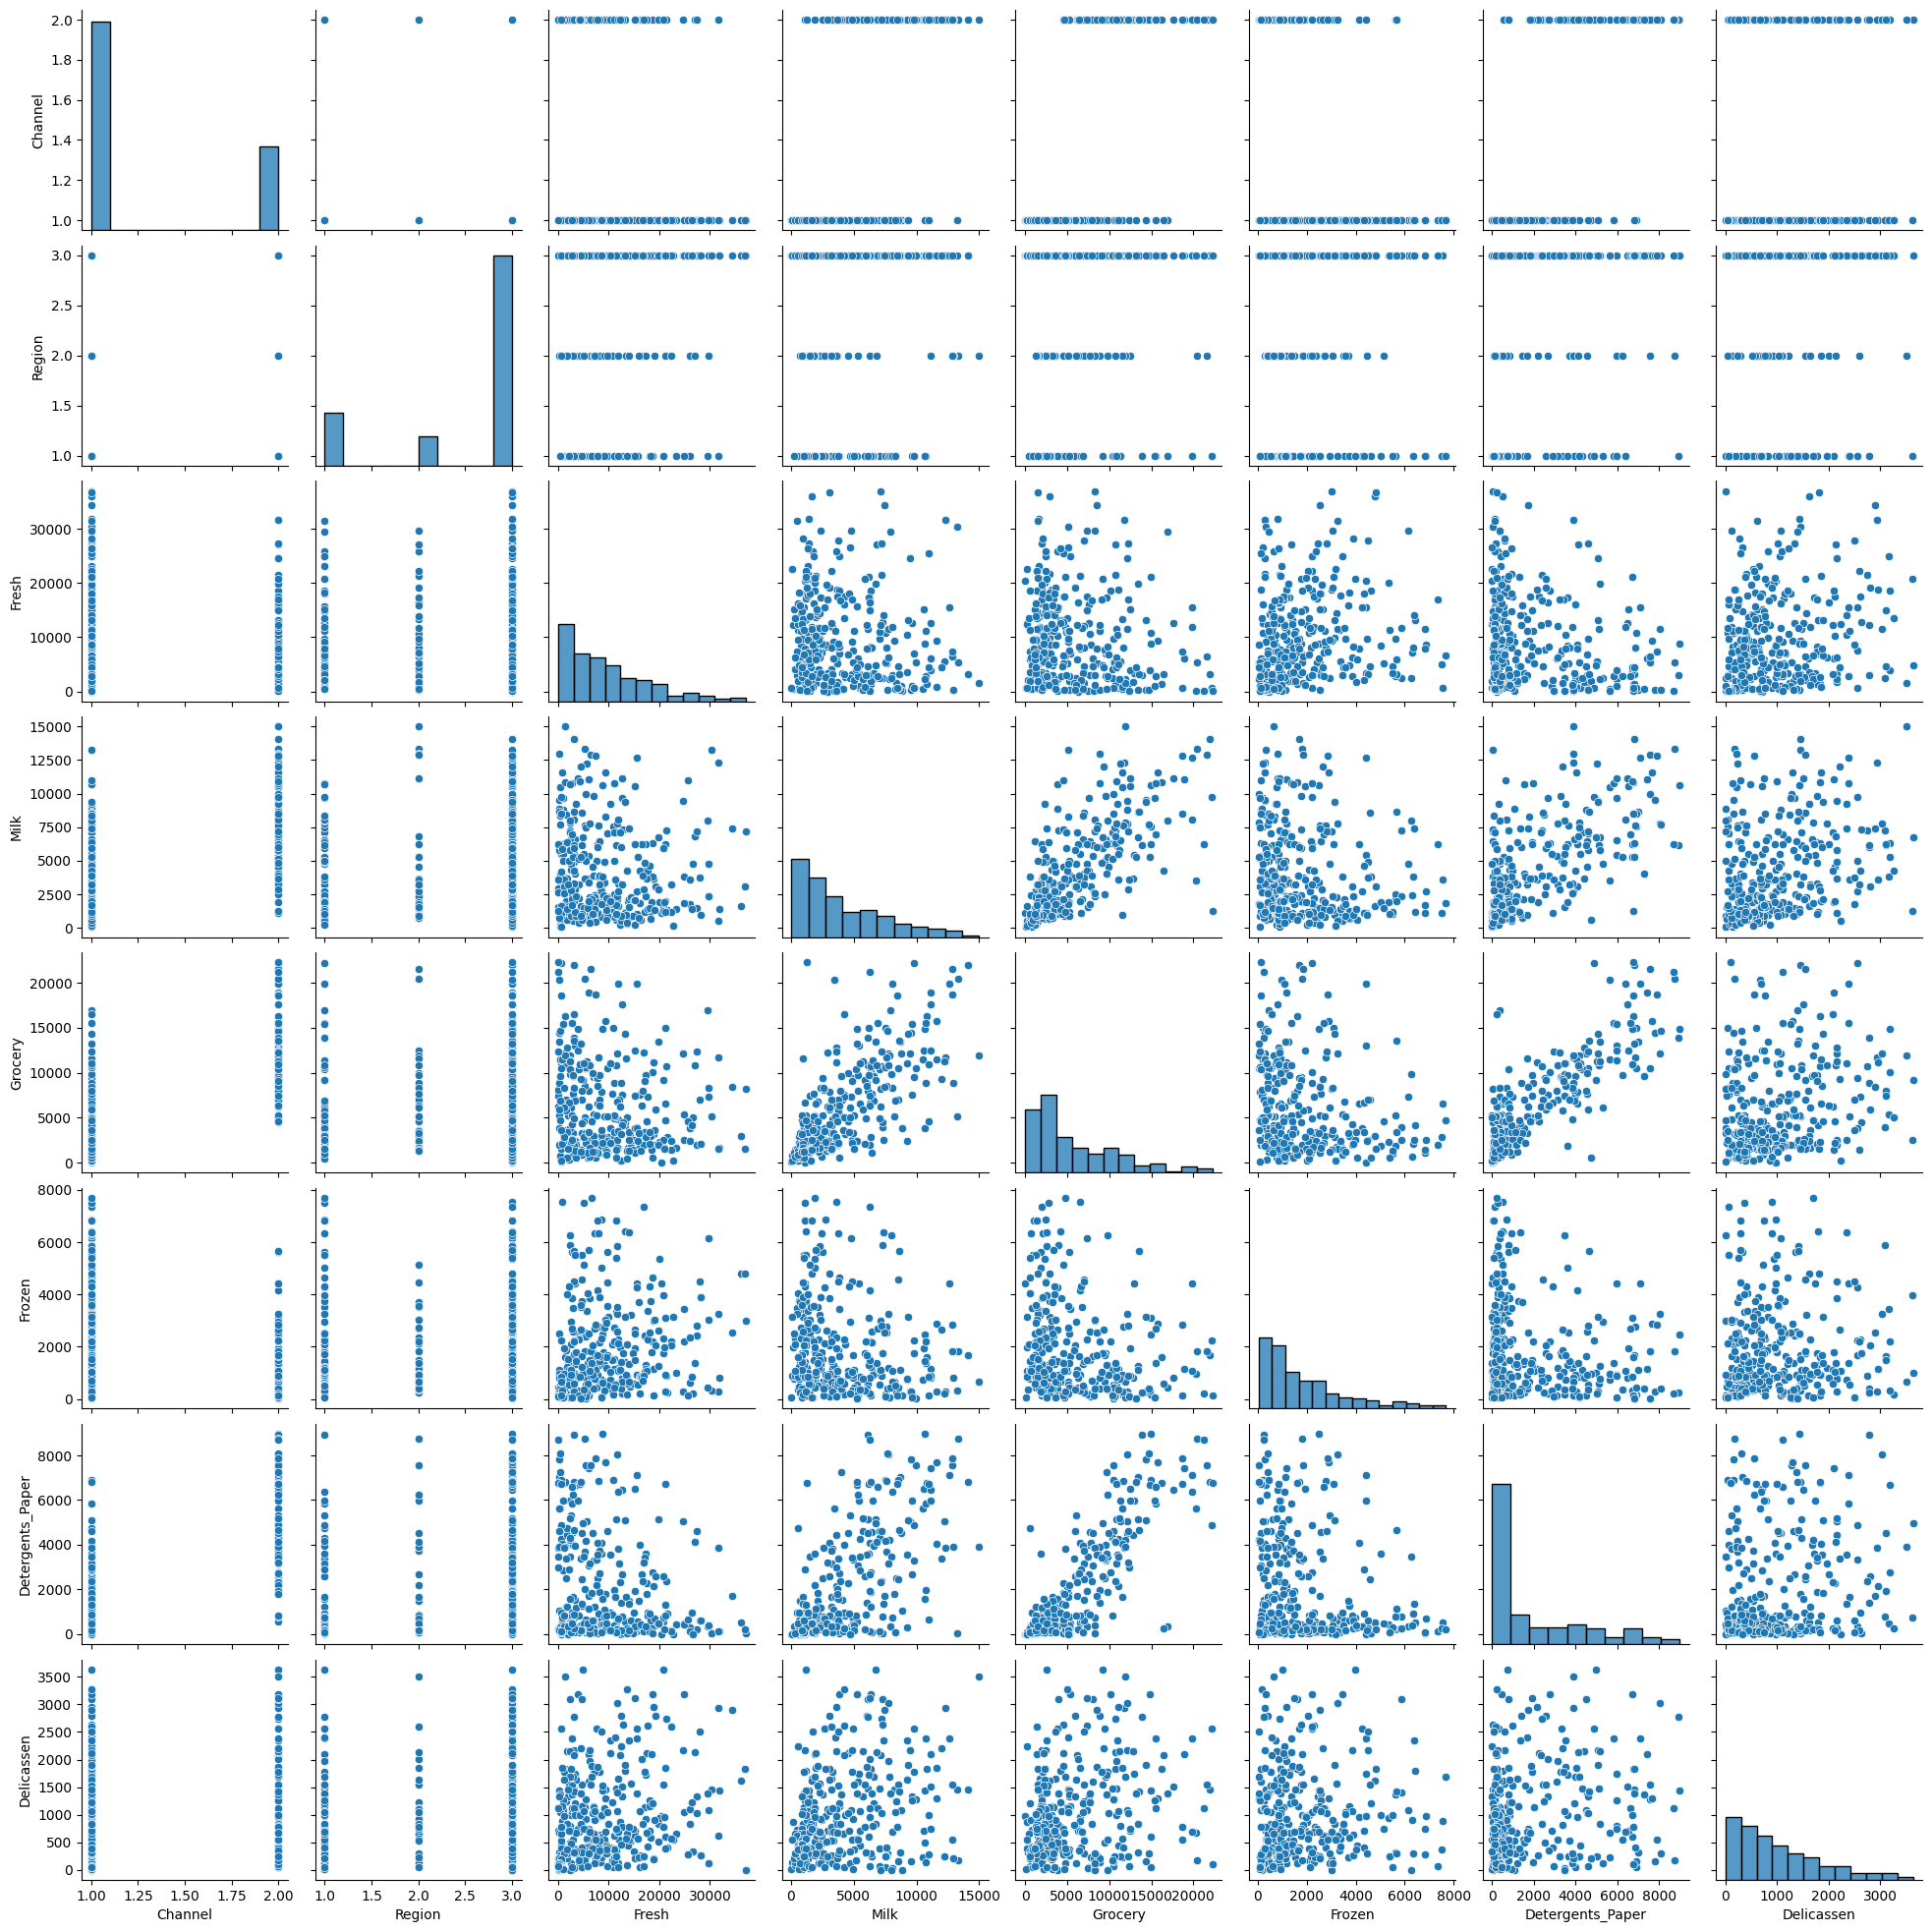

In [236]:
sns.pairplot(wc)
plt.show()

In [237]:
wc.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.126127,-0.113467,0.628692,0.722198,-0.199590,0.784068,0.230007
Region,0.126127,1.000000,0.000641,0.077833,0.068735,-0.099538,0.075176,0.038446
Fresh,-0.113467,0.000641,1.000000,-0.078081,-0.116159,0.184733,-0.226385,0.179424
Milk,0.628692,0.077833,-0.078081,1.000000,0.727206,-0.154348,0.683223,0.313687
Grocery,0.722198,0.068735,-0.116159,0.727206,1.000000,-0.199533,0.854322,0.273234
Frozen,-0.199590,-0.099538,0.184733,-0.154348,-0.199533,1.000000,-0.203810,0.050886
Detergents_Paper,0.784068,0.075176,-0.226385,0.683223,0.854322,-0.203810,1.000000,0.188180
Delicassen,0.230007,0.038446,0.179424,0.313687,0.273234,0.050886,0.188180,1.000000


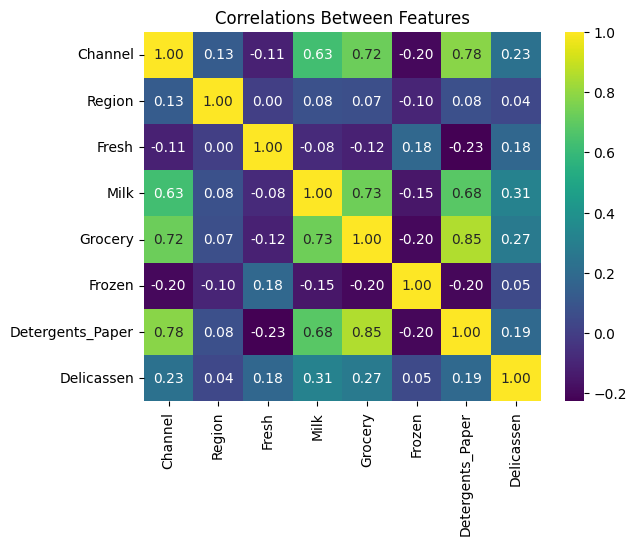

In [238]:
plt.Figure(figsize=(10,5))
sns.heatmap(wc.corr(),annot=True,cmap='viridis',fmt='.2f')
plt.title("Correlations Between Features")
plt.show()

In [239]:
x=wc.drop(['Channel','Region'],axis=1)

In [240]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [241]:
print(x)

[[ 0.38304079  1.65289825  0.33497772 -0.96700429  0.30505322  0.3904653 ]
 [-0.30558788  1.69875568  0.73387771 -0.05925481  0.56913935  0.92259064]
 [ 0.45617384 -0.86628288 -0.32886183  2.66282084 -0.61946154  0.93716941]
 ...
 [ 0.88147444 -0.05454674  0.42103835 -0.68904999  0.17578328 -0.21698372]
 [ 0.09112211 -0.63252908 -0.72418424 -0.48380948 -0.76409029  1.34659005]
 [-0.82954447 -0.71679956 -0.66893053 -1.05437811 -0.63226055 -1.17189357]]


In [242]:
from sklearn.cluster import KMeans

wcss=[]
k_range=range(1,11)
for i in k_range:
    km=KMeans(n_clusters=i,random_state=42)
    km.fit(x)
    wcss.append(km.inertia_)

In [243]:
print(wcss)

[1991.9999999999995, 1303.1342611098144, 1077.0435334708043, 920.6120391850388, 817.0656210127189, 745.8303874968885, 700.1510855946935, 655.2937920707661, 615.8084750882103, 585.8164459346609]


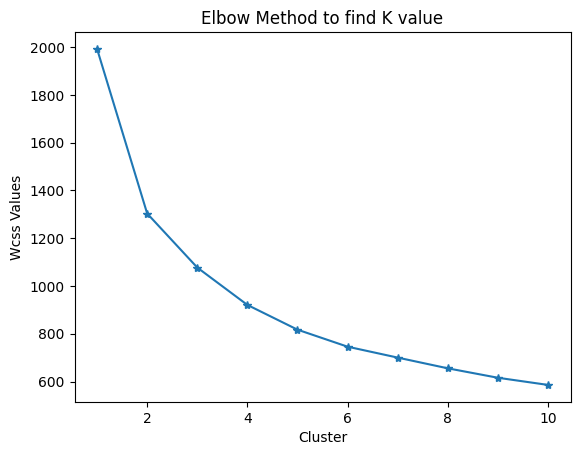

In [244]:
plt.plot(k_range,wcss,marker='*')
plt.xlabel("Cluster")
plt.ylabel("Wcss Values")
plt.title("Elbow Method to find K value")
plt.show()

In [245]:
km=KMeans(n_clusters=2,random_state=42)
km.fit_predict(x)


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [246]:
wc['Cluster']=km.fit_predict(x)
wc.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,1,3,13265,1196,4221,6404,507,1788,1
3,2,3,9413,8259,5126,666,1795,1451,0
4,2,3,12126,3199,6975,480,3140,545,1


In [247]:
wc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,1,3,13265,1196,4221,6404,507,1788,1
3,2,3,9413,8259,5126,666,1795,1451,0
4,2,3,12126,3199,6975,480,3140,545,1
...,...,...,...,...,...,...,...,...,...
327,1,3,21117,1162,4754,269,1328,395,1
328,1,3,1982,3218,1493,1541,356,1449,1
329,1,3,16731,3922,7994,688,2371,838,1
330,1,3,10290,1981,2232,1038,168,2125,1


In [248]:
wc.Cluster.value_counts()

Cluster
1    230
0    102
Name: count, dtype: int64

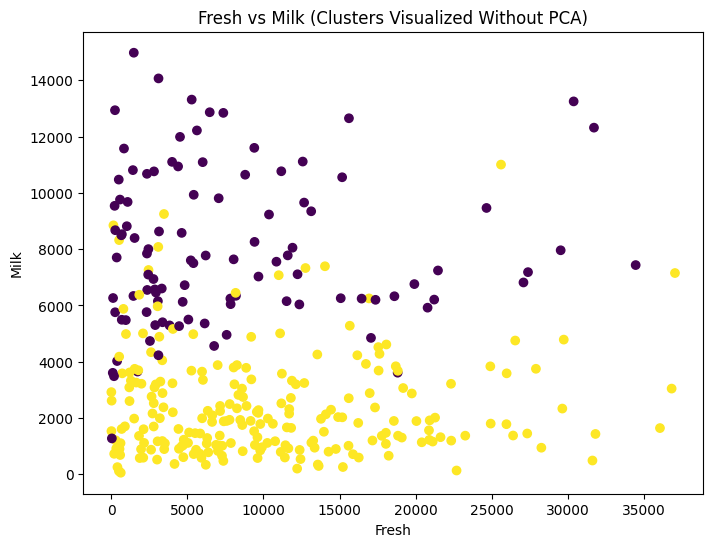

In [249]:
plt.figure(figsize=(8,6))
plt.scatter(wc['Fresh'], wc['Milk'], c=wc['Cluster'])
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title("Fresh vs Milk (Clusters Visualized Without PCA)")
plt.show()

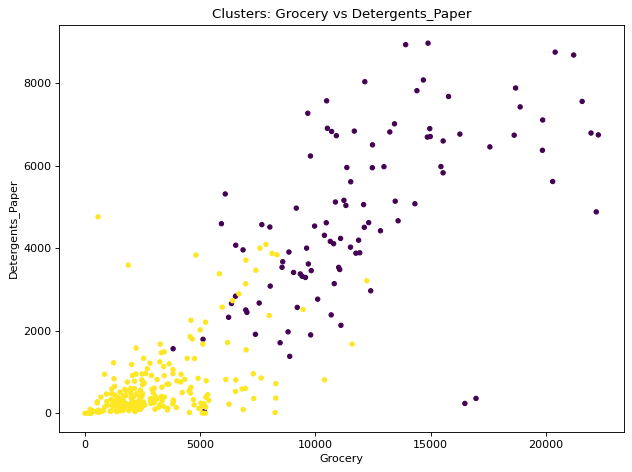

In [250]:
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(wc['Grocery'], wc['Detergents_Paper'], c=wc['Cluster'], s=15)
plt.xlabel("Grocery")
plt.ylabel("Detergents_Paper")
plt.title("Clusters: Grocery vs Detergents_Paper")
plt.tight_layout()
plt.show()

In [251]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

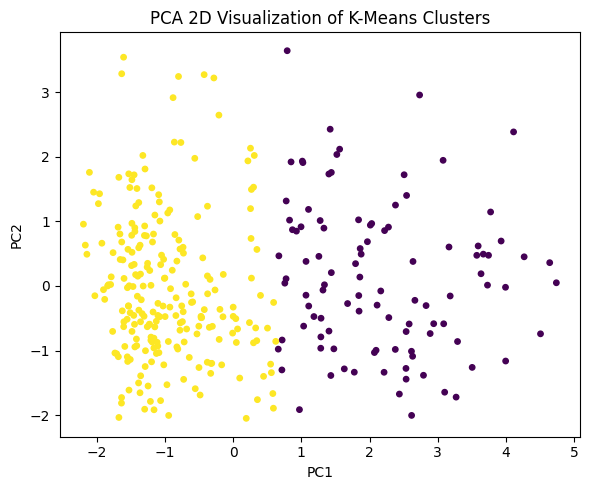

In [252]:
plt.figure(figsize=(6,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=wc['Cluster'], s=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Visualization of K-Means Clusters")
plt.tight_layout()
plt.show()

In [253]:
centroids = wc.groupby('Cluster').mean()

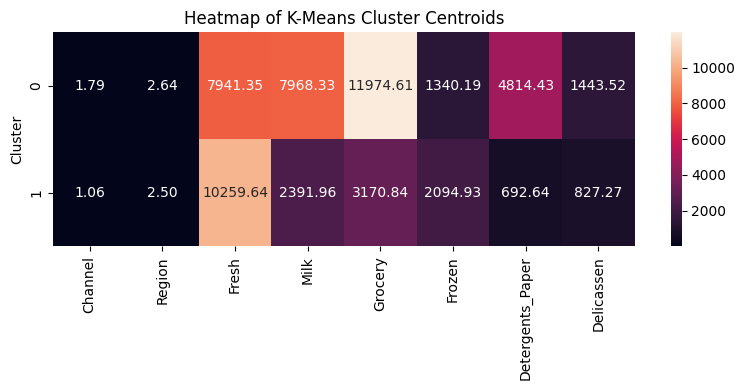

In [254]:
plt.figure(figsize=(8,4))
sns.heatmap(centroids, annot=True,fmt='.2f')
plt.title("Heatmap of K-Means Cluster Centroids")
plt.tight_layout()
plt.show()

In [255]:
import joblib
joblib.dump(km,"Kmeans_model.pkl")
joblib.dump(scaler,"Scaler.pkl")

['Scaler.pkl']